In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 6)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:

df.drop_duplicates(inplace=True)

In [13]:
df.drop('Id', axis=1, inplace=True)


# Univariate Analysis

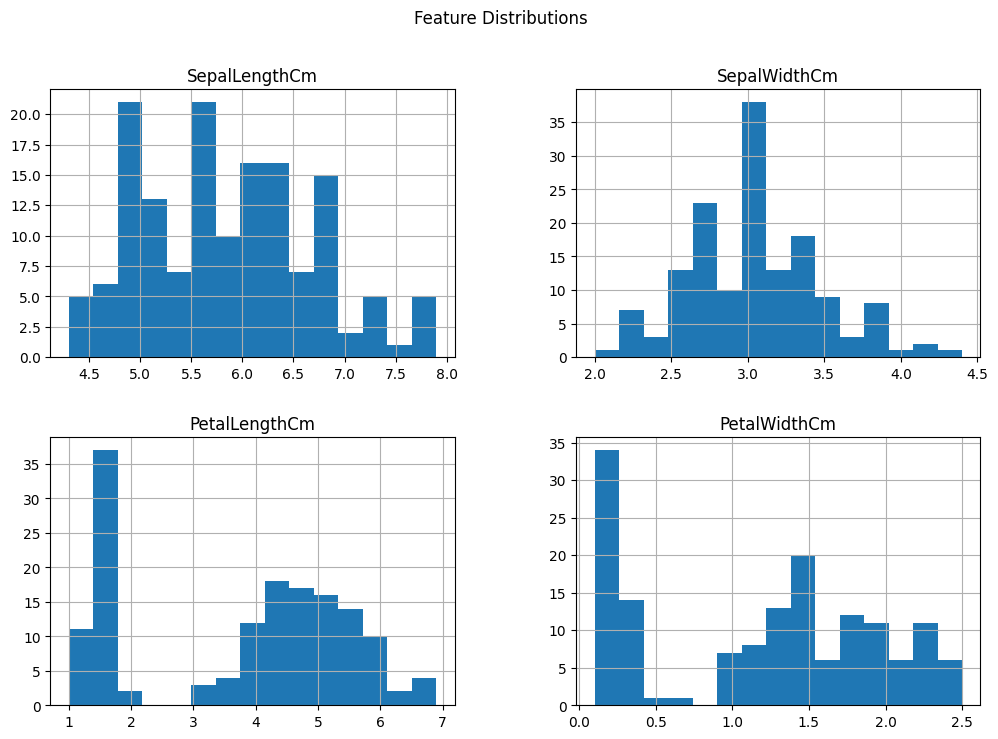

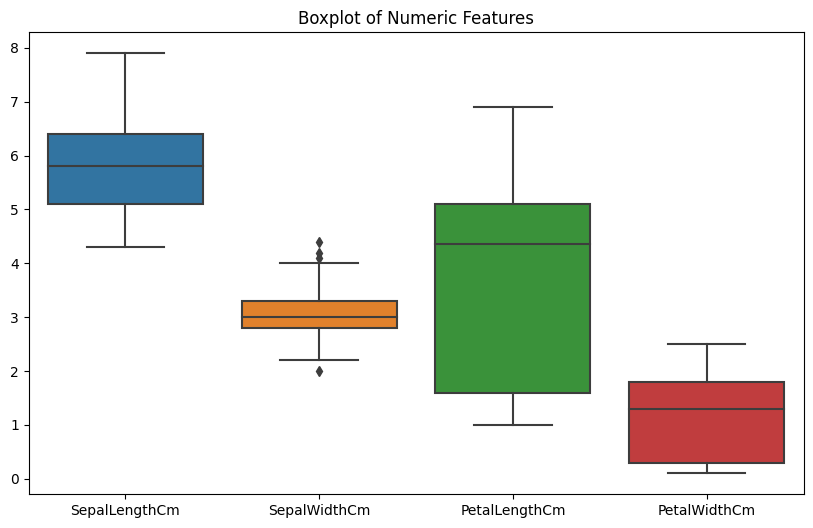

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12, 8), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('Species', axis=1))
plt.title('Boxplot of Numeric Features')
plt.show()


# basic statistics 

In [15]:
df.describe().T[['mean', '50%', 'std', 'min', 'max']]


,mean,50%,std,min,max
SepalLengthCm,5.843333,5.80,0.828066,4.3,7.9
SepalWidthCm,3.054000,3.00,0.433594,2.0,4.4
PetalLengthCm,3.758667,4.35,1.764420,1.0,6.9
PetalWidthCm,1.198667,1.30,0.763161,0.1,2.5


# Bivariate/Multivariate Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

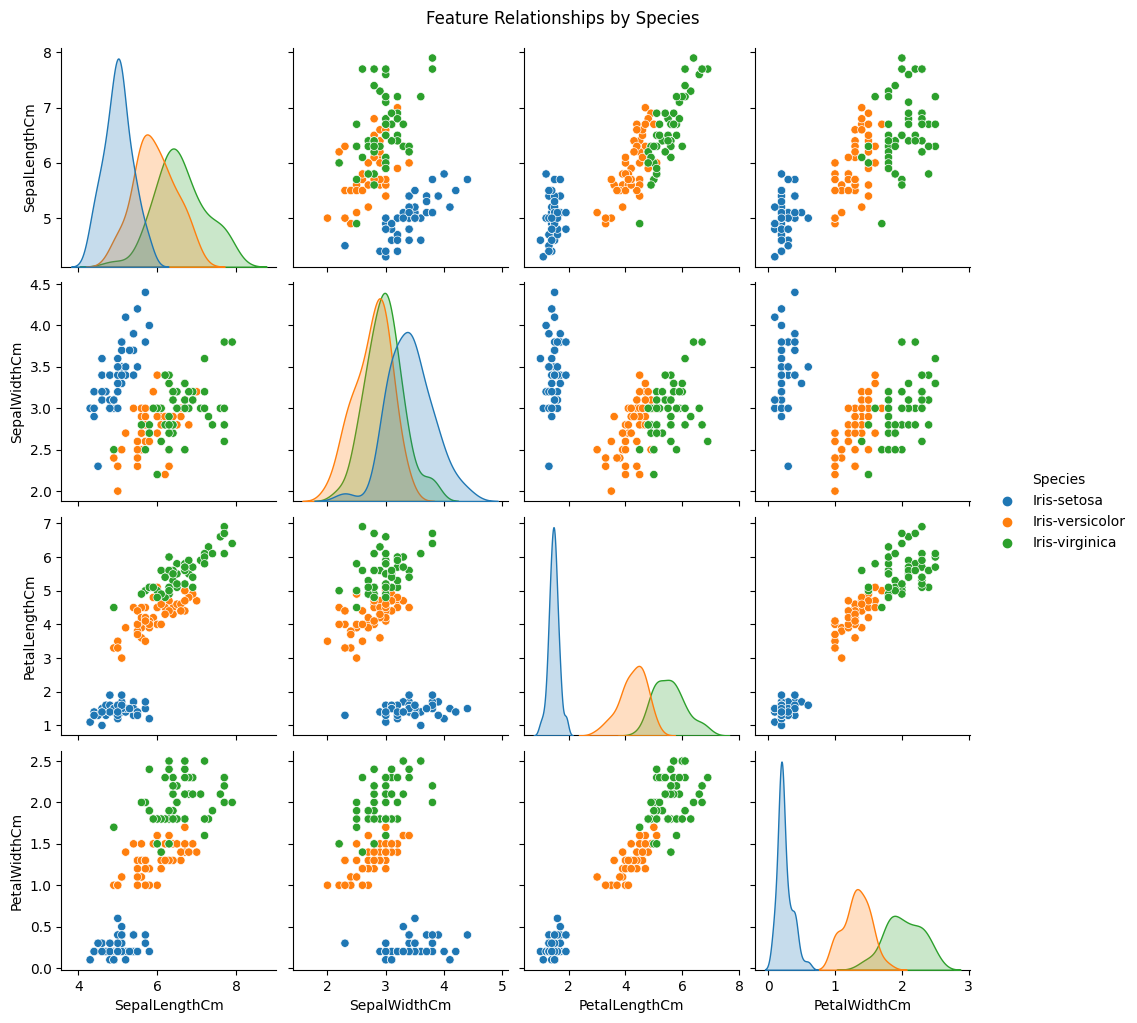

In [16]:
sns.pairplot(df, hue='Species')
plt.suptitle('Feature Relationships by Species', y=1.02)
plt.show()


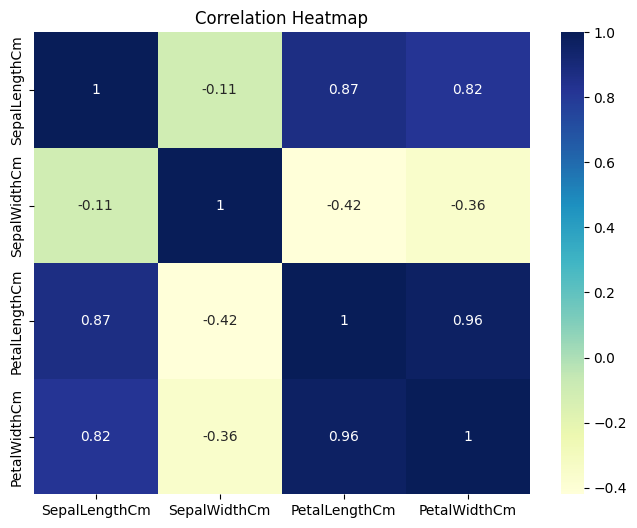

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


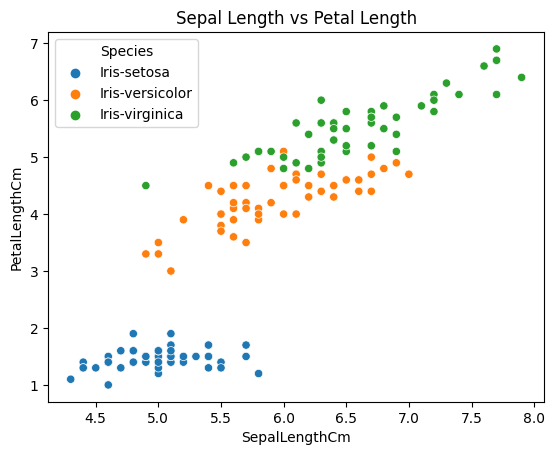

In [18]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.show()


# Summary

## 📌 Insights from EDA

### No missing or duplicate rows were found.
### Petal features (length & width) are highly effective at separating species.
### Setosa is clearly separable; Virginica and Versicolor have some overlap.
### PetalLengthCm` and `PetalWidthCm` show strong correlation.
### Sepal features are less informative than petal features for classification.


## 🎁 Bonus: Interactive Widgets

In [21]:
!pip install ipywidgets


In [ ]:
jupyter nbextension enable --py widgetsnbextension


In [22]:
import ipywidgets as widgets
from IPython.display import display


In [23]:
feature_dropdown = widgets.Dropdown(
    options=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    value='SepalLengthCm',
    description='Feature:',
)

bins_slider = widgets.IntSlider(
    value=10,
    min=5,
    max=30,
    step=1,
    description='Bins:',
)

def plot_histogram(feature, bins):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=bins, kde=True)
    plt.title(f'Distribution of {feature} with {bins} Bins')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

interactive_hist = widgets.interactive(plot_histogram, feature=feature_dropdown, bins=bins_slider)
display(interactive_hist)


interactive(children=(Dropdown(description='Feature:', options=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthC…

In [24]:
species_dropdown = widgets.Dropdown(
    options=df['Species'].unique(),
    value='Iris-setosa',
    description='Species:',
)

def plot_box(species):
    subset = df[df['Species'] == species]
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=subset.drop('Species', axis=1))
    plt.title(f'Boxplot of Features for {species}')
    plt.show()

interactive_box = widgets.interactive(plot_box, species=species_dropdown)
display(interactive_box)


interactive(children=(Dropdown(description='Species:', options=('Iris-setosa', 'Iris-versicolor', 'Iris-virgin…

In [25]:
x_axis = widgets.Dropdown(
    options=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    value='SepalLengthCm',
    description='X-axis:',
)

y_axis = widgets.Dropdown(
    options=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    value='PetalLengthCm',
    description='Y-axis:',
)

def plot_scatter(x, y):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x, y=y, hue='Species', data=df)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

interactive_scatter = widgets.interactive(plot_scatter, x=x_axis, y=y_axis)
display(interactive_scatter)


interactive(children=(Dropdown(description='X-axis:', options=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm…

# Summary

## 🎁 Bonus: Interactive Widgets

### Users can explore feature distributions by selecting features and bin sizes.
### Filtered boxplots help in analyzing per-species feature ranges.
### Scatter plot axes are customizable to study relationships.
